
Use the data set given below to classify the data with the following characteristics

*   Cost function: Logistic regression
*   method for finding the minimum: Gradient Descent

Find Optimal Classifier Weight Vector ${\bf w}^*$
Plot Decision Boundary
Plot Logistic Regression Cost & Quadratic Cost Functions as a function of iteration number




Optimal Weight Vector W: [[ 2.19789141]
 [-1.30810301]
 [ 2.88004307]]


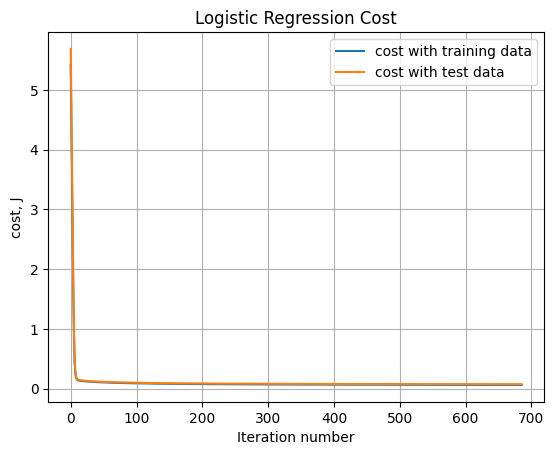

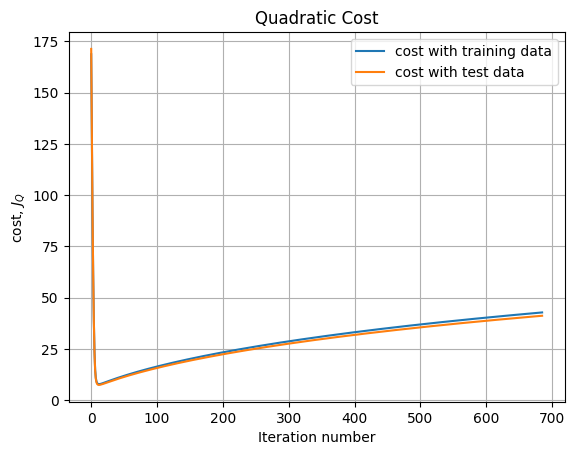

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

#Generate Data
N = 4000
X, y = make_blobs(n_samples=N, n_features=2, centers=2, cluster_std= 1,random_state=1001)
X = np.transpose(X)

#Separate Training and Test Sets
N_tr = int(N*0.8)
N_tst = N-N_tr
x_tr = X[:, 0:N_tr]
x_tr = np.vstack((np.ones(N_tr), x_tr))
y_tr = np.transpose(y[0:N_tr])
x_tst= X[:, N_tr:]
x_tst = np.vstack((np.ones(N_tst), x_tst))
y_tst = np.transpose(y[N_tr:])

#Gradient Descent
epsilon = 1e-3
d = np.shape(x_tr)[0]
w = 2*np.ones([d,1])
temp = np.matmul(np.transpose(w), x_tr )
alpha = 0.1
E_train_logistic = []
E_test_logistic = []
E_train_Q = []
E_test_Q = []
i_step = 0
Convergence_flag = 1
while Convergence_flag:
  gradient = 1/N_tr * np.sum(x_tr * (1/(1+np.exp(-(np.matmul(np.transpose(w), x_tr )))) - y_tr) , axis=1) # this is the gradient using the sigmoid function cost
  gradient = gradient.reshape(d,1)
  w_new = w  - alpha*gradient
  if np.linalg.norm(w_new-w) <= epsilon:
    Convergence_flag = 0
  w = 1.0 * w_new
  #Calculate the logistic regression cost
  temp2 = y_tr * np.log(1+np.exp(-(np.matmul(np.transpose(w), x_tr )))) + \
          (1-y_tr) * np.log(1+np.exp((np.matmul(np.transpose(w), x_tr ))))
  E_tr = 1/N_tr * np.sum(temp2)
  E_train_logistic = np.append(E_train_logistic, E_tr )
  temp2 = y_tst * np.log(1+np.exp(-(np.matmul(np.transpose(w), x_tst )))) + \
          (1-y_tst) * np.log(1+np.exp((np.matmul(np.transpose(w), x_tst ))))
  E_ts = 1/N_tst * np.sum(temp2)
  E_test_logistic = np.append(E_test_logistic, E_ts )
  #Calculate the quadratic cost
  temp = np.square(np.matmul(np.transpose(w), x_tr ) - y_tr)
  E_tr = 1/N_tr * np.sum(temp)
  E_train_Q = np.append(E_train_Q, E_tr )
  E_ts = 1/N_tst * np.sum(np.square((np.matmul(np.transpose(w), x_tst ) - y_tst)))
  E_test_Q = np.append(E_test_Q, E_ts )

plt.figure()
plt.plot(E_train_logistic, label='cost with training data')
plt.plot(E_test_logistic, label='cost with test data' )
plt.legend()
plt.grid()
plt.title('Logistic Regression Cost')
plt.xlabel('Iteration number')
plt.ylabel('cost, J')

plt.figure()
plt.plot(E_train_Q, label='cost with training data')
plt.plot(E_test_Q, label='cost with test data' )
plt.legend()
plt.grid()
plt.title('Quadratic Cost')
plt.xlabel('Iteration number')
plt.ylabel('cost, $J_Q$')

print("Optimal Weight Vector W:", w)



Text(0.5, 1.0, 'Decision Boundary for Logistic Regression Function')

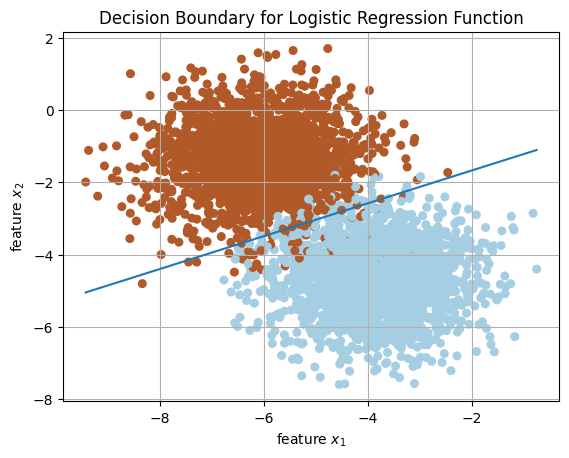

In [2]:
#Scatter Plot
plt.scatter(X[0, :], X[1, :], c=y, s=30, cmap=plt.cm.Paired)
xx = np.linspace(np.min(X[0, :]),np.max(X[0, :]),100)
yy = -w[1]/w[2]*xx + (0.0 - w[0])/w[2]
plt.plot(xx,yy)
plt.grid()
plt.xlabel('feature $x_1$')
plt.ylabel('feature $x_2$')
plt.title('Decision Boundary for Logistic Regression Function')

You observe that the quadratic and logistic loss function are different. Change the parameter random_state=1001 in the code above both for the logistic regression that you solved and the quadratic solution that is provided in this project. See how the loss changes and how the classification regions change. What can you say about the difference between these two classifiers?

-Adjusting the random state to different values changes the extent to which the two features are separated, making them easier or harder to classify. The quadratic loss function appears to converge in fewer iterations and with a lower cost. The logistic loss function appears to be better at classifying test data when the data is well separated, compared to the quadratic loss function.